<a href="https://colab.research.google.com/github/sandarnaing/tutorial/blob/main/rdkit_getStart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 14.2 MB/s eta 0:00:00


Reading single molecule

In [ ]:
from rdkit import Chem

In [ ]:
m = Chem.MolFromSmiles('CC(=O)NC1=CC=C(C=C1)O')

In [ ]:
from rdkit.Chem import Draw

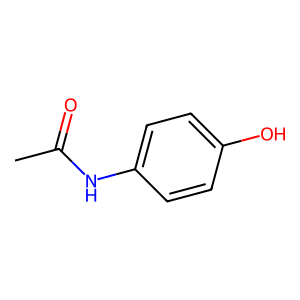

In [ ]:
img = Draw.MolToImage(m)
img

In [ ]:
# invalid or error
m1 = Chem.MolFromSmiles('c1cc1')
m1 is None

[08:57:13] Can't kekulize mol.  Unkekulized atoms: 0 1 2


True

Reading sets of molecules

In [ ]:
# bash command to combine all molecules in one sdf file
# cat *.sdf >> compound_library.sdf

In [ ]:
suppl = Chem.SDMolSupplier('drugs.sdf')
for mol in suppl:
  print(mol.GetNumAtoms())

11
13
10
10
21


In [ ]:
mols = [x for x in suppl]
len(mols)

5

In [ ]:
suppl[1].GetNumAtoms()

13

In [ ]:
with Chem.SDMolSupplier('drugs.sdf') as suppl:
  for mol in suppl:
    if mol is None: continue
    print(mol.GetNumAtoms())

11
13
10
10
21


In [ ]:
inf = open('drugs.sdf', 'rb')
with Chem.ForwardSDMolSupplier(inf) as fsuppl:
  for mol in fsuppl:
    if mol is None: continue
    print(mol.GetNumAtoms())

11
13
10
10
21


In [ ]:
import gzip

inf = gzip.open('drugs.sdf.gz')
with Chem.ForwardSDMolSupplier(inf) as zsuppl:
  ms = [x for x in zsuppl if x is not None]
len(ms)

5

In [ ]:
i = 0
with Chem.MultithreadedSDMolSupplier('drugs.sdf') as sdSupl:
  for mol in sdSupl:
    if mol is not None:
      i += 1

print(i)

5


Writing molecules

In [ ]:
m = Chem.MolFromMolFile('structure_1.sdf')
Chem.MolToSmiles(m)

'CC(=O)Nc1ccc(O)cc1'

In [ ]:
Chem.MolToSmiles(m, isomericSmiles=False)

'CC(=O)Nc1ccc(O)cc1'

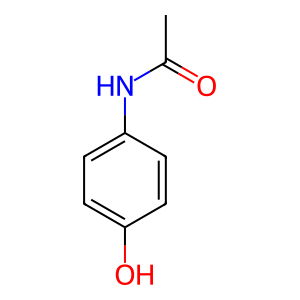

In [ ]:
Draw.MolToImage(m)

In [ ]:
Chem.Kekulize(m)
Chem.MolToSmiles(m, kekuleSmiles = True)

'CC(=O)NC1=CC=C(O)C=C1'

In [ ]:
Chem.MolToMolBlock(m)

'1983\n     RDKit          2D\n\n 11 11  0  0  0  0  0  0  0  0999 V2000\n    2.8660   -2.5950    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    4.5981    1.4050    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8660    1.4050    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8660    0.4050    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.0000   -0.0950    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.7320   -0.0950    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.0000   -1.0950    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.7320   -1.0950    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8660   -1.5950    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.7320    1.9050    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.7320    2.9050    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n  1  9  1  0\n  2 10  2  0\n  3  4  1  0\n  3 10  1  0\n  4  5  2  0\n  4  6  1  0\n  5  7  1  0\n  6  8  2  0\n  7  9  2  0\n  8  9  1  0\n 10 1

In [ ]:
Chem.MolToV3KMolBlock(m)

'1983\n     RDKit          2D\n\n  0  0  0  0  0  0  0  0  0  0999 V3000\nM  V30 BEGIN CTAB\nM  V30 COUNTS 11 11 0 0 0\nM  V30 BEGIN ATOM\nM  V30 1 O 2.866000 -2.595000 0.000000 0\nM  V30 2 O 4.598100 1.405000 0.000000 0\nM  V30 3 N 2.866000 1.405000 0.000000 0\nM  V30 4 C 2.866000 0.405000 0.000000 0\nM  V30 5 C 2.000000 -0.095000 0.000000 0\nM  V30 6 C 3.732000 -0.095000 0.000000 0\nM  V30 7 C 2.000000 -1.095000 0.000000 0\nM  V30 8 C 3.732000 -1.095000 0.000000 0\nM  V30 9 C 2.866000 -1.595000 0.000000 0\nM  V30 10 C 3.732000 1.905000 0.000000 0\nM  V30 11 C 3.732000 2.905000 0.000000 0\nM  V30 END ATOM\nM  V30 BEGIN BOND\nM  V30 1 1 1 9\nM  V30 2 2 2 10\nM  V30 3 1 3 4\nM  V30 4 1 3 10\nM  V30 5 2 4 5\nM  V30 6 1 4 6\nM  V30 7 1 5 7\nM  V30 8 2 6 8\nM  V30 9 2 7 9\nM  V30 10 1 8 9\nM  V30 11 1 10 11\nM  V30 END BOND\nM  V30 END CTAB\nM  END\n'

In [ ]:
m.SetProp("_Name", "Acetaminophen")
print(Chem.MolToMolBlock(m))

Acetaminophen
     RDKit          2D

 11 11  0  0  0  0  0  0  0  0999 V2000
    2.8660   -2.5950    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.5981    1.4050    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.8660    1.4050    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.8660    0.4050    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0000   -0.0950    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7320   -0.0950    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0000   -1.0950    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7320   -1.0950    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8660   -1.5950    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7320    1.9050    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7320    2.9050    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  9  1  0
  2 10  2  0
  3  4  1  0
  3 10  1  0
  4  5  2  0
  4  6  1  0
  5  7  1  0
  6  8  2  0
  7  9  2  0
  8  9  1  0
 10 11  1  0
M  END



In [ ]:
from rdkit.Chem import AllChem
AllChem.Compute2DCoords(m)

0

In [ ]:
print(Chem.MolToMolBlock(m))

Acetaminophen
     RDKit          2D

 11 11  0  0  0  0  0  0  0  0999 V2000
    4.0738    0.6025    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.3942    1.5592    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7218   -0.9504    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2729   -0.5622    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1153    0.8867    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7878   -1.6228    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5642    1.2750    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2367   -1.2346    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.6249    0.2143    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.7824    0.1103    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.2313   -0.2780    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  9  1  0
  2 10  2  0
  3  4  1  0
  3 10  1  0
  4  5  2  0
  4  6  1  0
  5  7  1  0
  6  8  2  0
  7  9  2  0
  8  9  1  0
 10 11  1  0
M  END



In [ ]:
m2 = Chem.AddHs(m)
params = AllChem.ETKDGv3()
params.randomSeed = 0xf00d #optional
AllChem.EmbedMolecule(m2, params)

0

In [ ]:
print(Chem.MolToMolBlock(m2))

Acetaminophen
     RDKit          3D

 20 20  0  0  0  0  0  0  0  0999 V2000
    4.1372    0.0558    0.4083 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8163    0.8669    1.6513 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3233   -0.3023   -0.3006 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.0759   -0.2031   -0.1235 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7375    0.8733   -0.6560 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7259   -1.2105    0.5895 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1016    0.9489   -0.4706 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0882   -1.1063    0.7575 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.7585   -0.0310    0.2271 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2341    0.2532    0.6214 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.6795    0.0999    0.3535 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.5925    0.9255    0.6512 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6878   -0.7968   -1.1306 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.1775  

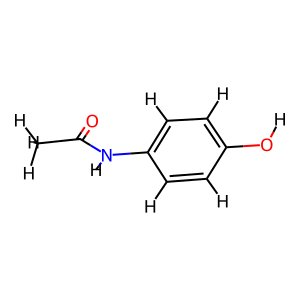

In [ ]:
Draw.MolToImage(m2)